In [38]:
# Backend
%matplotlib inline

# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Import data
data = pd.read_csv('C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/data_stocks.csv')

In [4]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
# Drop date variable
data = data.drop(['DATE'], 1)

In [6]:
# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

In [7]:
# Make data a np.array
data = data.values

In [10]:
 # Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [11]:
# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [47]:
len(data_train)

33012

In [12]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [57]:
data[:,0]

array([2363.6101, 2364.1001, 2362.6799, ..., 2470.03  , 2471.49  ,
       2471.49  ])

In [13]:
# Number of stocks in training data
n_stocks = X_train.shape[1]

In [14]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

In [15]:
# Session
net = tf.InteractiveSession()

In [16]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [17]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [18]:
# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

In [19]:
# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [20]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

In [21]:
# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [22]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [23]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [24]:
# Init
net.run(tf.global_variables_initializer())

<IPython.core.display.Javascript object>


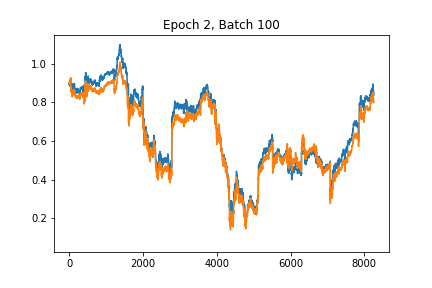

In [43]:
# Backend again
%matplotlib notebook
%matplotlib notebook

# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

In [44]:
# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

In [46]:
# Run
epochs = 3
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('Epoch ' + str(e) + ', Batch ' + str(i))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            #fig = plt.figure()
            #ax1 = fig.add_subplot(111)
            #line1, = ax1.plot(y_test)
            #line2, = ax1.plot(pred)
            #plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)

Epoch 0, Batch 0
MSE Train:  0.00015293378
MSE Test:  0.0014454161
Epoch 0, Batch 50
MSE Train:  0.00013197382
MSE Test:  0.0019028784
Epoch 0, Batch 100
MSE Train:  6.5180066e-05
MSE Test:  0.0018984552
Epoch 1, Batch 0
MSE Train:  5.0239658e-05
MSE Test:  0.002680144
Epoch 1, Batch 50
MSE Train:  9.057677e-05
MSE Test:  0.0013547621
Epoch 1, Batch 100
MSE Train:  8.2398474e-05
MSE Test:  0.0017242522
Epoch 2, Batch 0
MSE Train:  9.761778e-05
MSE Test:  0.0030215557
Epoch 2, Batch 50
MSE Train:  7.394152e-05
MSE Test:  0.0016004399
Epoch 2, Batch 100
MSE Train:  6.370033e-05
MSE Test:  0.0018851052
